# Assignment 1

**Due to**: 11/01/2022 (dd/mm/yyyy)

If you deliver it by 11/12/2021 your assignment will be graded by 11/01/2022.


**Credits**: Andrea Galassi, Federico Ruggeri, Paolo Torroni

**Summary**: Part-of Speech (POS) tagging as Sequence Labelling using Recurrent Neural Architectures

Please, read ALL the following instructions :)

# Intro

In this assignment  we will ask you to perform POS tagging using neural architectures

You are asked to follow these steps:
*   Download the corpora and split it in training and test sets, structuring a dataframe.
*   Embed the words using GloVe embeddings
*   Create a baseline model, using a simple neural architecture
*   Experiment doing small modifications to the baseline model, choose hyperparameters using the validation set
*   Evaluate your two best model
*   Analyze the errors of your model


**Task**: given a corpus of documents, predict the POS tag for each word

**Corpus**:
Ignore the numeric value in the third column, use only the words/symbols and its label. 
The corpus is available at:
https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip

**Splits**: documents 1-100 are the train set, 101-150 validation set, 151-199 test set.


**Features**: you MUST use GloVe embeddings as the only input features to the model.

**Splitting**: you can decide to split documents into sentences or not, the choice is yours.

**I/O structure**: The input data will have three dimensions: 1-documents/sentences, 2-token, 3-features; for the output there are 2 possibilities: if you use one-hot encoding it will be 1-documents/sentences, 2-token labels, 3-classes, if you use a single integer that indicates the number of the class it will be 1-documents/sentences, 2-token labels.

**Baseline**: two layers architecture: a Bidirectional LSTM layer and a Dense/Fully-Connected layer on top; the choice of hyper-parameters is yours.

**Architectures**: experiment using a GRU instead of the LSTM, adding an additional LSTM layer, and adding an additional dense layer; do not mix these variantions.


**Training and Experiments**: all the experiments must involve only the training and validation sets.

**Evaluation**: in the end, only the two best models of your choice (according to the validation set) must be evaluated on the test set. The main metric must be F1-Macro computed between the various part of speech. DO NOT CONSIDER THE PUNCTUATION CLASSES. [What is punctuation?]{https://en.wikipedia.org/wiki/English_punctuation}

**Metrics**: the metric you must use to evaluate your final model is the F1-macro, WITHOUT considering punctuation/symbols classes; during the training process you can use accuracy because you can't use the F1 metric unless you use a single (gigantic) batch because there is no way to aggregate "partial" F1 scores computed on mini-batches.

**Discussion and Error Analysis** : verify and discuss if the results on the test sets are coherent with those on the validation set; analyze the errors done by your model, try to understand which may be the causes and think about how to improve it.

**Report**: you are asked to deliver the code of your experiments and a small pdf report of about 2 pages; the pdf must begin with the names of the people of your team and a small abstract (4-5 lines) that sums up your findings.

# Out Of Vocabulary (OOV) terms

How to handle words that are not in GloVe vocabulary?
You can handle them as you want (random embedding, placeholder, whatever!), but they must be STATIC embeddings (you cannot train them).

But there is a very important caveat! As usual, the element of the test set must not influence the elements of the other splits!
If you use random embeddings or placeholder embeddings (e.g., everything is 0) this is automatically solved.

If you want to use other techniques: when you compute new embeddings for train+validation, you must forget about test documents.
The motivation is to emulate a real-world scenario, where you select and train a model in the first stage, without knowing nothing about the testing environment.

For implementation convenience, you CAN use a single vocabulary file/matrix/whatever. The principle of the previous point is that the embeddings inside that file/matrix must be generated independently for train and test splits.

Basically in a real-world scenario, this is what would happen:
1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Training of the model(s)
5. Compute embeddings for terms OOV2 of the validation split 
6. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
7. Validation of the model(s)
8. Compute embeddings for terms OOV3 of the test split 
9. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
10. Testing of the final model

In this case, where we already have all the documents, we can simplify the process a bit, but the procedure must remain rigorous.

1. Starting vocabulary V1 (in this assignment, GloVe vocabulary)
2. Compute embeddings for terms out of vocabulary V1 (OOV1) of the training split 
3. Add embeddings to the vocabulary, so to obtain vocabulary V2=V1+OOV1
4. Compute embeddings for terms OOV2 of the validation split 
5. Add embeddings to the vocabulary, so to obtain vocabulary V3=V1+OOV1+OOV2
6. Compute embeddings for terms OOV3 of the test split 
7. Add embeddings to the vocabulary, so to obtain vocabulary V4=V1+OOV1+OOV2+OOV3
8. Training of the model(s)
9. Validation of the model(s)
10. Testing of the final model

Step 2 and step 6 must be completely independent of each other, for what concerns the method and the documents. But they can rely on the previous vocabulary (V1 for step 2 and V3 for step 6)
THEREFORE if a word is present both in the training set and the test split and not in the starting vocabulary, its embedding is computed in step 2) and it is not considered OOV anymore in step 6).

# Report
The report must not be just a copy and paste of graphs and tables!

The report must not be longer than 2 pages and must contain:
* The names of the member of your team
* A short abstract (4-5 lines) that sum ups everything
* A general (brief!) description of the task you have addressed and how you have addressed it
* A brief analysis of the data (class distribution, lenght, etc)
* A short description of the models you have used
* Some tables that sum up your findings in validation and test and a discussion of those results
* The most relevant findings of your error analysis


# Evaluation Criterion

The goal of this assignment is not to prove you can find best model ever, but to face a common task, structure it correctly, and follow a correct and rigorous experimental procedure.
In other words, we don't care if you final models are awful as long as you have followed the correct procedure and wrote a decent report.

The score of the assignment will be computed roughly as follows
* 1 point for the correctness of approach/methodology
* 1 point for the handling of OOV terms
* 1 point for the correct implementation of models (they must run and do the right thing)
* 1 point for train-validation-test procedure
* 2 point for the discussion of the results, error analysis, and report

The evaluation will not be based on the performance of the models!

We also reserve the right to assign a small bonus (0.5 points) to any assignment that is particularly worthy. 

# Deliver

* Two files: a pdf file for the report, and a python notebook
* Put the names of the member of the team at the beginning of both files
* What about additional files, for example models or weights? You can upload them in a private cloud and insert the link in the report.
* Please, submit a notebook with clear sections, text boxes, and comments and indications about what is going on in the code. When we do not understand what is going on we get annoyed, when we are annoyed we tend to be more severe in our evaluation.



# Contacts

In case of any doubt, question, issue, or help we highly recommend you to check the [course useful material](https://virtuale.unibo.it/pluginfile.php/1273064/mod_resource/content/2/NLP_Course_Useful_Material.pdf) for additional information, and to use the Virtuale forums to discuss with other students.

You can always contact us at the following email addresses. To increase the probability of a prompt response, we reccomend you to write to both the teaching assistants.
If we do not reply within 3-4 days, please send it again!

Teaching Assistants:

* Andrea Galassi -> a.galassi@unibo.it
* Federico Ruggeri -> federico.ruggeri6@unibo.it

Professor:

* Paolo Torroni -> p.torroni@unibo.it


# Additional notes and FAQ
* You can use a non-trainable Embedding layer to load the glove embeddings
* For the baseline, it must have only two trainable layers: the BiLSTM and the Dense/FC one. The Dense layer is the "classification head" with softmax activation. You must not add an additional dense layer on top of the baseline. You can use the embedding layer before the BiLSTM, but it must be not trainable.
* You can use any library of your choice to implement the networks. Two options are tensorflow/keras or pythorch. Both these libraries have all the classes you need to implement these simple architectures and there are plenty of tutorials around, where you can learn how to use them.
* For the application of the Dense Layer, it is recommended to use a Time-Distributed Dense. In any case, doing otherwise is NOT considered an error.
* Some examples of things you can analyze in your discussion and error analysis are: the performances on the most frequent classes and the less frequent classes, precision and recall, the confusion tables, specific misclassified samples.
* Punctuation: you must keep the punctuation in the documents, since it may be helpful for the model, you simply must ignore it when you perform the evaluation of the model, not considering the punctuation classes among the ones you use to compute F1 macro score. If you are curious, you can run ADDITIONAL experiments where you remove punctuation to see its impact.

# STEP 1
We start by downloading and extracting the dataset, resolving dependecies and including the required libraries.


In [1]:
!wget https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
!unzip dependency_treebank.zip
!rm dependency_treebank.zip

--2022-12-26 17:47:22--  https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/packages/corpora/dependency_treebank.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 457429 (447K) [application/zip]
Saving to: ‘dependency_treebank.zip’

dependency_treebank 100%[===================>] 446.71K  --.-KB/s    in 0.009s  

2022-12-26 17:47:23 (51.2 MB/s) - ‘dependency_treebank.zip’ saved [457429/457429]

Archive:  dependency_treebank.zip
   creating: dependency_treebank/
  inflating: dependency_treebank/wsj_0093.dp  
  inflating: dependency_treebank/wsj_0065.dp  
  inflating: dependency_treebank/wsj_0039.dp  
  inflating: dependency_treebank/wsj_0182.dp  
  inflating: dependency_treebank/wsj_0186.dp  
  inflating: dependency_treebank/wsj_0041.dp  
  inflating:

In [2]:
# Gensim is a Python library for topic modelling, document indexing and similarity retrieval with large corpora
!pip install gensim

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import pandas as pd
import os
import string
import numpy as np
import matplotlib.pyplot as plt
import gensim
import gensim.downloader as gloader
import os
import shutil
import random
import tensorflow as tf
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay,f1_score, accuracy_score, classification_report, confusion_matrix

from keras_preprocessing.sequence import pad_sequences
from functools import partial

from keras.layers import Input, Embedding, Bidirectional, LSTM, Dense, TimeDistributed, Activation, GRU
from keras.models import Model

%matplotlib inline

# Step 2
We first fix the seed needed for the pseudo-random generation. Then we create directories for the datasets and we split the dataset with samples 1-100 for the train set, 101-150 for the validation set, 151-199 for the test set.
When loading the dataset, every token is lowercased as only pre-processing step.

In [4]:
seed = 42
random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['TF_DETERMINISTIC_OPS'] = '1'

In [5]:
!mkdir train_set
!mkdir val_set
!mkdir test_set

In [6]:
# Move first 100 text file to train
for i in range(1, 101):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/train_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 101-150 text file to val
for i in range(101, 151):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/val_set/' + file_name)
  shutil.move(src_name, trg_name)

# Move 151-199 text file to test
for i in range(151, 200):
  file_name = "wsj_" + ("0" * (4 - len(str(i)))) + str(i) + ".dp"
  src_name = os.path.join('/content/dependency_treebank/' + file_name)
  trg_name = os.path.join('/content/test_set/' + file_name)
  shutil.move(src_name, trg_name)

!rm -rf "/content/dependency_treebank"

In [7]:
def create_dataframe(dataset_path):
  """
  This function is needed to return the list of lists containing of lowercased sentences 
  with the associated list of lists of POS tagging labels.
  It also returns the vocabulary (set) of the words used and the considered POS tags (set).

  :param dataset_path: path where the dataset is stored.
  """
  dataframe_x_rows =  []
  dataframe_y_rows = []

  sentence_x_row = []
  sentence_y_row = []

  words = set([])
  tags = set([])

  for file_name in os.listdir(dataset_path): 
    file_path = dataset_path + "/" + file_name
    file_number = file_name.split(".")[0].split("_")[1]

    with open(file_path, mode='r', encoding='utf-8') as file_text:
      lines = file_text.readlines()

      for line in lines:
        split_line = line.split("\t")
        if len(split_line) > 1:
          word = split_line[0].lower() # lowercasing
          pos_tag = split_line[1]

          words.add(word)
          tags.add(pos_tag)

          sentence_x_row.append(word)
          sentence_y_row.append(pos_tag)
          # each entry of the dataset is a sentence, so we stop when we 
          # find a strong punctuation symbol or ";"
          if word == '.' or word == ';':
            dataframe_x_rows.append(sentence_x_row)
            dataframe_y_rows.append(sentence_y_row)
            sentence_x_row = []
            sentence_y_row = []

  return dataframe_x_rows, dataframe_y_rows, words, tags

In [8]:
df_train_x, df_train_y, train_words, train_tags = create_dataframe("/content/train_set")

In [9]:
df_val_x, df_val_y, val_words, val_tags = create_dataframe("/content/val_set")

In [10]:
df_test_x, df_test_y, test_words, test_tags = create_dataframe("/content/test_set")

Here are presented some statistics over tags and sentences. 

In [11]:
for cur_df in [df_train_x, df_val_x, df_test_x]:
  sentence_length = [len(i) for i in cur_df]
  mean_sentence_length = sum(sentence_length)/len(sentence_length)
  max_sentence_length = max(sentence_length)
  min_sentence_length = min(sentence_length)
  

  print("Sentence length statistics: ")
  print(f"mean: {mean_sentence_length }")
  print(f"max: {max_sentence_length}")
  print(f"min: {min_sentence_length}")


Sentence length statistics: 
mean: 23.408798813643106
max: 67
min: 2
Sentence length statistics: 
mean: 23.569916855631142
max: 88
min: 2
Sentence length statistics: 
mean: 23.805513016845328
max: 72
min: 3


number of tags in the training set: 45
number of tags in the validation set: 44
number of tags in the test set: 40
number of tags in the whole dataset: 45
Plot of the distributions of tags in train, validation and test: 
Missing tags for the train set: set()
Missing tags for the validation set: {'SYM'}
Missing tags for the test set: {'LS', 'FW', 'UH', 'SYM', '#'}


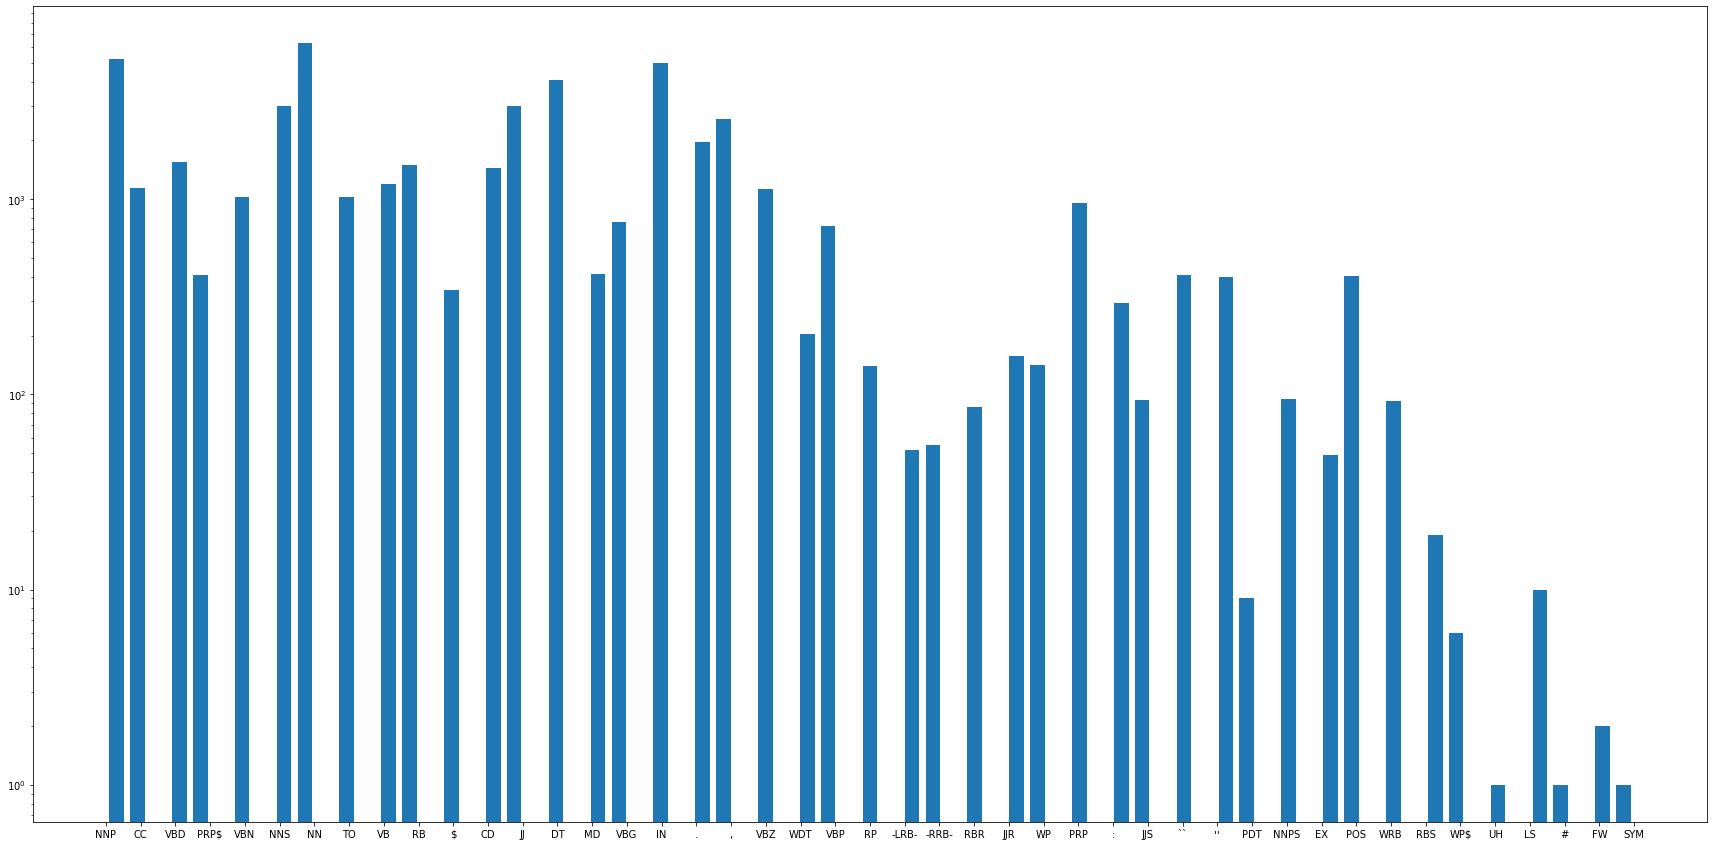

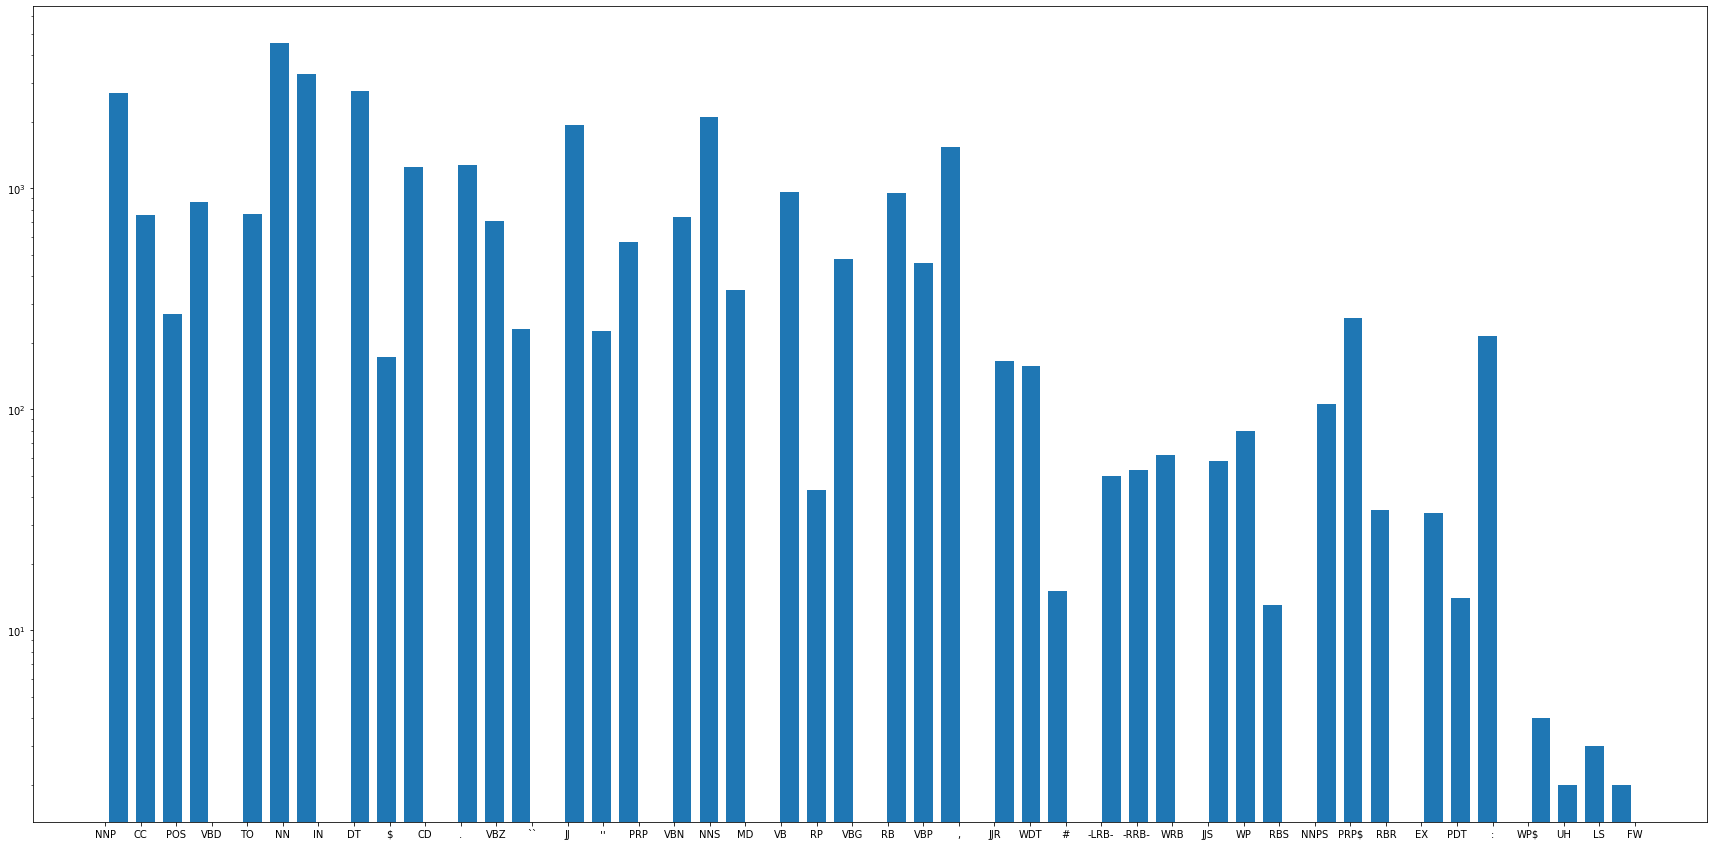

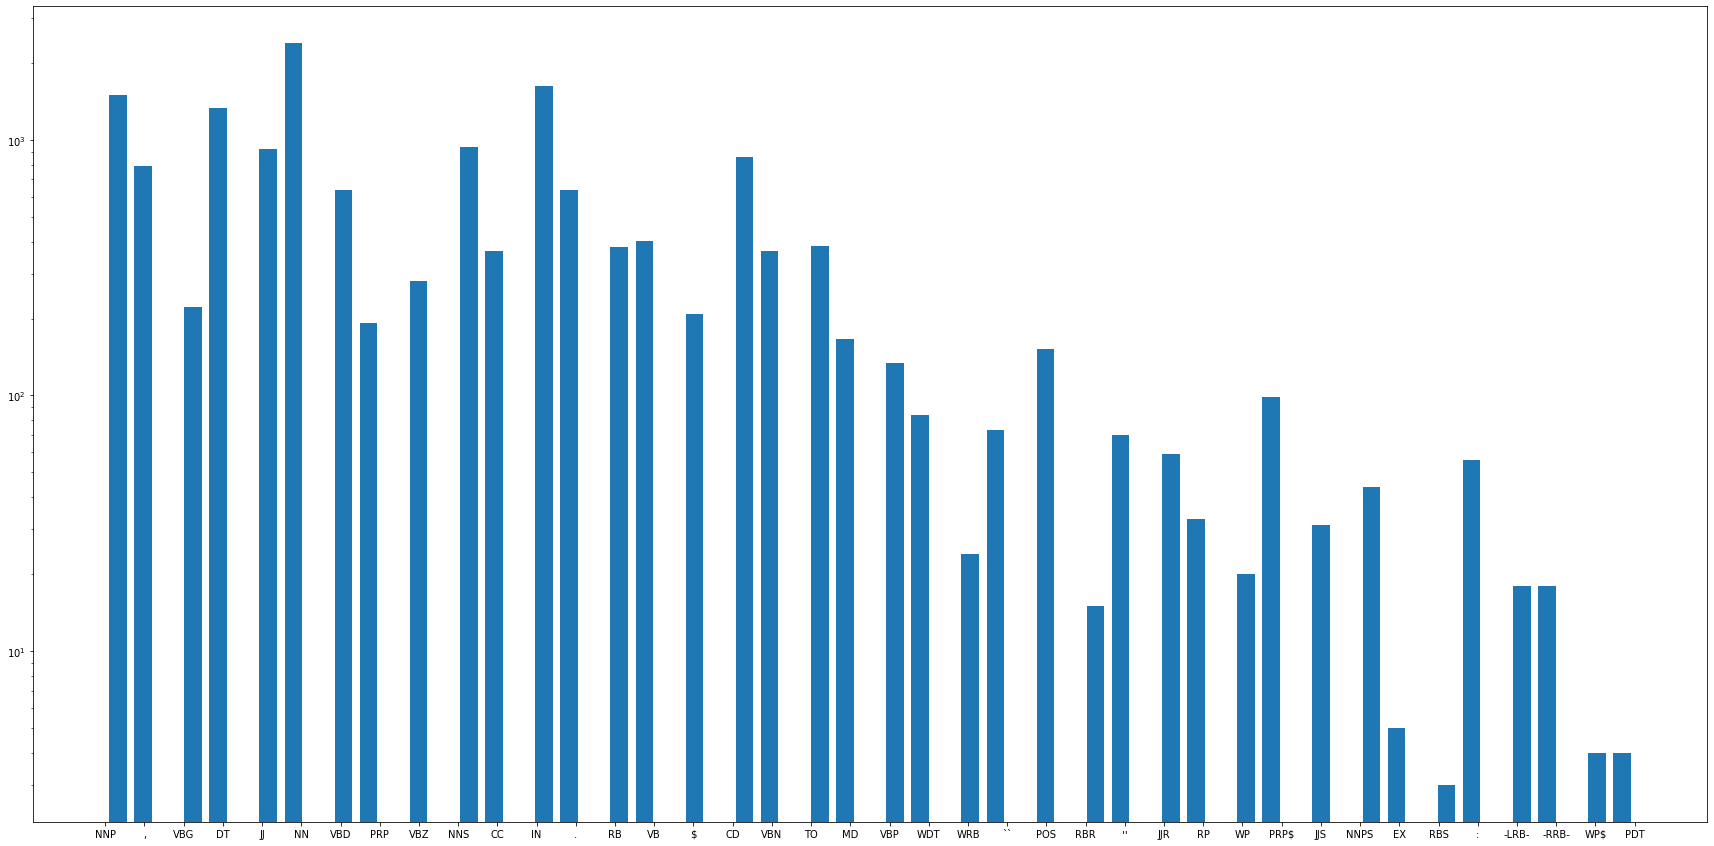

In [14]:
# simple block to plot the distribution of the tags in the datasets
print(f"number of tags in the training set: {len(train_tags)}")
print(f"number of tags in the validation set: {len(val_tags)}")
print(f"number of tags in the test set: {len(test_tags)}")
union_set = train_tags|val_tags|test_tags
print(f"number of tags in the whole dataset: {len(train_tags|val_tags|test_tags)}")

print("Plot of the distributions of tags in train, validation and test: ")
for cur_df in [df_train_y, df_val_y, df_test_y]:
  flatten_y = [word for sentence in cur_df for word in sentence]

  plt.figure(figsize=(30, 15))
  plt.hist(flatten_y, bins="auto", log=True, rwidth=0.7);

missing_train_tags = union_set - train_tags 
missing_val_tags = union_set - val_tags 
missing_test_tags = union_set - test_tags 
print(f"Missing tags for the train set: {missing_train_tags}" )
print(f"Missing tags for the validation set: {missing_val_tags}" )
print(f"Missing tags for the test set: {missing_test_tags}" )

In [16]:
# the current choice is to give an id to each word
word2index =  {w: i + 2 for i, w in enumerate(set(list(train_words) + list(val_words) + list(test_words)))}
word2index['<PAD>'] = 0
word2index['<OOV>'] = 1

# same things applies here it is exploited the possibility to assign an id to
# tags, but one hot encoding could be performed instead
print("Here we show statistics for the vocabularies: ")
print("Lenght of the complete word vocabulary: " + str(len(word2index.keys()))) 
print("Length of the vocabulary of the training set: " + str(len(train_words)))
print("Length of the vocabulary of the validation set: " + str(len(val_words)))
print("Length of the vocabulary of the test set: " + str(len(test_words)))
print("Total length: " + str(len(train_words) + len(val_words) + len(test_words)))

Here we show statistics for the vocabularies: 
Lenght of the complete word vocabulary: 10949
Length of the vocabulary of the training set: 7404
Length of the vocabulary of the validation set: 5420
Length of the vocabulary of the test set: 3407
Total length: 16231


In [12]:
def convert_all_sentences_to_indexes(df_x):
  """
  function converting each token of each sentence to the embedding matrix indexes

  :param df_x: list containing the sentences as list of tokens.
  
  """
  sentences_X = []
  for sentence in df_x:
    converted_sentence = []
    for word in sentence:
      try:
        converted_sentence.append(word2index[word])
      except KeyError:
        converted_sentence.append(word2index["<OOV>"])
    sentences_X.append(converted_sentence)
  return sentences_X


In [17]:
train_sentences_X = convert_all_sentences_to_indexes(df_train_x)
val_sentences_X = convert_all_sentences_to_indexes(df_val_x)
test_sentences_X = convert_all_sentences_to_indexes(df_test_x)

print(f"number of sentences in train_sentences_X: {len(train_sentences_X)}")
print(f"number of sentences in val_sentences_X: {len(val_sentences_X)}")
print(f"number of sentences in test_sentences_X: {len(test_sentences_X)}")

number of sentences in train_sentences_X: 2023
number of sentences in val_sentences_X: 1323
number of sentences in test_sentences_X: 653


Then we proceed to split and pad the input sequences. No further preprocessing step is required other than lowercasing all the tokens, as tokenization is already provided by the dataset and techniques as stemming and lemmatization would deprive the words of their syntactic role. Also normalization isn't so necessary due to GloVe containing often redundant embeddings.

In [24]:
# fitting a OneHotEncoder over tags
encoder = OneHotEncoder(sparse = False)
encoder.fit(np.array(list(union_set)).reshape(-1, 1))
n_classes = len(union_set)

45


In [ ]:
# we will use this parameter to create the padding of each sentence
MAX_LENGTH = len(max(train_sentences_X, key=len))

In [ ]:
# converting tags to the associated indexes
def convert_to_one_hot(df_y, encoder):
  """
  Function encoding tags with their respective one-hot vector

  :param df_y: list containing the lists of tags to be converted
  :param encoder: sklearn's encoder instance already fit on the whole set of tags
  """
  converted_one_hot_y = []
  for sentence in df_y:
    container = np.zeros((MAX_LENGTH, len(encoder.categories_[0])))
    single_encoded_sentence = encoder.transform(np.array(sentence).reshape(-1, 1))
    len_sentence = single_encoded_sentence.shape[0]
    if len_sentence >= MAX_LENGTH:
      container[:, :] = single_encoded_sentence[:MAX_LENGTH, :]
    else:
      container[:len_sentence, :] = single_encoded_sentence
      container[len_sentence:, :] = single_encoded_sentence[-1, :]
    converted_one_hot_y.append(container)
  return converted_one_hot_y


In [ ]:
train_tags_y = convert_to_one_hot(df_train_y, encoder)
val_tags_y = convert_to_one_hot(df_val_y, encoder)
test_tags_y = convert_to_one_hot(df_test_y, encoder)

In [ ]:
# printing all the tags in order to recognize which of these are punctuation
# marks
print("List of all tags: ")
for tag in list(union_set):
  print(tag)

List of all tags: 
DT
MD
JJR
NNP
VBN
EX
FW
WP
RBS
NN
PDT
''
PRP
IN
RB
RP
UH
NNPS
POS
JJS
LS
CD
NNS
WDT
RBR
JJ
VB
VBZ
#
VBP
VBD
CC
VBG
-LRB-
WRB
PRP$
TO
``
$
WP$
,
SYM
-RRB-
.
:


In [ ]:
# adding a padding to each sentence, since they must have a fixed dimension 
train_sentences_X = pad_sequences(train_sentences_X, maxlen=MAX_LENGTH, padding='post')
val_sentences_X = pad_sequences(val_sentences_X, maxlen=MAX_LENGTH, padding='post')
test_sentences_X = pad_sequences(test_sentences_X, maxlen=MAX_LENGTH, padding='post')
train_tags_y = np.asarray(train_tags_y)
val_tags_y = np.asarray(val_tags_y)
test_tags_y = np.asarray(test_tags_y)

print(f"shape of train_tags_y: {train_tags_y.shape}")
print(f"shape of val_tags_y: {val_tags_y.shape}")
print(f"shape of test_tags_y: {test_tags_y.shape}")

shape of train_tags_y: (2023, 67, 45)
shape of val_tags_y: (1323, 67, 45)
shape of test_tags_y: (653, 67, 45)


We then proceede to download the file containing GloVe embeddings and to build the embedding matrix. To deal with OOV we tried both random embeddings and embeddings built by averaging those of the 2 words preceding and following them in the sentences (see the function for further details). In the end, the latter technique reported slightly lower scores, so we sticked with the former, as it was also more efficient.
The reason could be that more than the semantic content of the word (which is also determined by its context), what is more important in this task is to determine the syntactic role of the word. So, averaging across words that more likely have different roles from the considered one, may be not a good idea.

In [ ]:
#   /$$$$$$$  /$$$$$$        /$$   /$$ /$$$$$$ /$$$$$$$$       /$$$$$$$  /$$$$$$ /$$      /$$/$$   /$$/$$       /$$$$$$  /$$$$$$ /$$$$$$$        /$$$$$$$$/$$      /$$/$$$$$$ /$$$$$$ /$$$$$$$$      
#  | $$__  $$/$$__  $$      | $$$ | $$/$$__  $|__  $$__/      | $$__  $$/$$__  $| $$  /$ | $| $$$ | $| $$      /$$__  $$/$$__  $| $$__  $$      |__  $$__| $$  /$ | $|_  $$_//$$__  $| $$_____/      
#  | $$  \ $| $$  \ $$      | $$$$| $| $$  \ $$  | $$         | $$  \ $| $$  \ $| $$ /$$$| $| $$$$| $| $$     | $$  \ $| $$  \ $| $$  \ $$         | $$  | $$ /$$$| $$ | $$ | $$  \__| $$            
#  | $$  | $| $$  | $$      | $$ $$ $| $$  | $$  | $$         | $$  | $| $$  | $| $$/$$ $$ $| $$ $$ $| $$     | $$  | $| $$$$$$$| $$  | $$         | $$  | $$/$$ $$ $$ | $$ | $$     | $$$$$         
#  | $$  | $| $$  | $$      | $$  $$$| $$  | $$  | $$         | $$  | $| $$  | $| $$$$_  $$$| $$  $$$| $$     | $$  | $| $$__  $| $$  | $$         | $$  | $$$$_  $$$$ | $$ | $$     | $$__/         
#  | $$  | $| $$  | $$      | $$\  $$| $$  | $$  | $$         | $$  | $| $$  | $| $$$/ \  $$| $$\  $$| $$     | $$  | $| $$  | $| $$  | $$         | $$  | $$$/ \  $$$ | $$ | $$    $| $$            
#  | $$$$$$$|  $$$$$$/      | $$ \  $|  $$$$$$/  | $$         | $$$$$$$|  $$$$$$| $$/   \  $| $$ \  $| $$$$$$$|  $$$$$$| $$  | $| $$$$$$$/         | $$  | $$/   \  $$/$$$$$|  $$$$$$| $$$$$$$$      
#  |_______/ \______/       |__/  \__/\______/   |__/         |_______/ \______/|__/     \__|__/  \__|________/\______/|__/  |__|_______/          |__/  |__/     \__|______/\______/|________/      
#                                                                                                                                                                                                    
#                                                                                                                                                                                                    
#  (reminder to not waste time)

# setting up the embedding model, in our case it is GloVe
embedding_dimension = 100
embedding_model = gloader.load("glove-wiki-gigaword-" + str(embedding_dimension))

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# this more elaborate way of computing embedding is not much useful than using random ones

def compute_embedding(word, embedding_model, dataset, previously_computed_embeddings):
  """
  given a word, an embedding_model, the dataset to consider and the previously_computed_embeddings,
  we compute the embedding for an OOV word as the mean of the embeddings of the two preceeding and following words
  in each sentence of the whole dataset (i.e. if we just have the sentence w_1 w_2 oov w_3 w_4 
  we have emb_oov = (ew_1 + ew_2 + ew_3 + ew_4)/4
  if a neighbouring word is an oov itself, we add a random vector and if the target oov word has no neighbors
  we assign a random vector as its embedding.

  :param word: the word which embedding must be computed
  :param embedding_model: dictionary containing words and their pre-trained embedding
  :param dataset: list of sentencese where the contexts of word can be extracted
  :param previously_computed_embeddings: dictionary containing words and their embedding
    already computed by this function. This allows the embedding computation pipeline to be correct w.r.t.
    standard procedures when dealing with the different dataset splits
  """
  acc = np.zeros(embedding_dimension)
  count = 0
  for sentence in dataset: # for every sentence in the dataset
    if word in sentence: # if the word is in the sentence
      index = sentence.index(word) # get the index of the sentence

      if index != 0: # if the token isn't the initial one 
        try:
          acc += embedding_model[sentence[index-1]] # add the embedding if it is in gloVe
        except (KeyError, TypeError):
          if sentence[index-1] in previously_computed_embeddings.keys(): # add the embedding if was already computed
            acc += previously_computed_embeddings[sentence[index-1]]
          else:
            # otherwise, screw it, and add a random vector
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        # increment the count
        count += 1
      # if the word isn't the last, do the same as before

      if index != len(sentence)-1:
        try:
          acc += embedding_model[sentence[index+1]] 
        except (KeyError, TypeError):
          if sentence[index+1] in previously_computed_embeddings.keys():
            acc += previously_computed_embeddings[sentence[index+1]]
          else:
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        count += 1

      if index != 1: # if the token isn't the initial one 
        try:
          acc += embedding_model[sentence[index-2]] # add the embedding if it is in gloVe
        except (KeyError, TypeError):
          if sentence[index-2] in previously_computed_embeddings.keys(): # add the embedding if was already computed
            acc += previously_computed_embeddings[sentence[index-2]]
          else:
            # otherwise, add a random vector
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        # increment the count
        count += 1
      # if the word isn't the last, do the same as before

      if index != len(sentence)-2:
        try:
          acc += embedding_model[sentence[index+2]] 
        except (KeyError, TypeError):
          if sentence[index+2] in previously_computed_embeddings.keys():
            acc += previously_computed_embeddings[sentence[index+2]]
          else:
            acc += np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
        count += 1
      
# return the mean embedding
  if count == 0:
    return np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension)
  else:
    return acc/count


In [ ]:
# construction of the embedding matrix, it is a matrix N_token x E_dim
# whose entries are the vectors corresponding to each word in the 
# embedding space, identified by idx
def build_embedding(num_tokens, embedding_dimension, 
                    word2index, embedding_model, 
                    df_train_x = None, df_val_x = None, df_test_x = None,
                    train_words = None, val_words = None, test_words = None, use_random_embedding = True):
  """
  function building the embedding matrix.

  :param num_tokens: total number of different tokens in the corpus
  :param embedding_dimension: lenght of the vector embeddings
  :param word2index: dictionary of pairs (word : token_idx). Contains also OOV and PAD indexes
  :param embedding_model: dictionary containing the pre-trained embeddings
  :param df_train_x, df_val_x, df_test_x: (optional) corpus dataset required to compute contextual embeddings
  :param train_words, val_words, test_words: (optional) corpus vocabulary required to compute contextual embeddings
  :param use_random_embedding: boolean indicating whether to use randomly generated embeddings or contextual embeddings
  """
  oov_dict = {'training':[], 'val':[], 'test':[]}
  # we need to count how many oov we have
  count_oov = 0
  oov_list = []
  embedding_matrix = np.zeros((num_tokens, embedding_dimension))
  for word, idx in word2index.items():
    # we give an embedding also to the padding, which will be ignored by the net
    try:
      embedding_vector = embedding_model[word]
    except (KeyError, TypeError):
      count_oov += 1
      oov_list.append(word)
      if use_random_embedding:
        embedding_vector = np.random.uniform(low=-0.05, high=0.05, size=embedding_dimension) # random placeholder
        embedding_matrix[idx] = embedding_vector
      else:
        if word in train_words:
          oov_dict['training'].append(word)
        elif word in val_words:
          oov_dict['val'].append(word)
        elif word in test_words:
          oov_dict['test'].append(word)

  if not use_random_embedding:
    previously_computed_embeddings = dict()
    for oov in oov_dict['training']:
      vector = compute_embedding(oov, embedding_model, df_train_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector

    for oov in oov_dict['val']:
      vector = compute_embedding(oov, embedding_model, df_val_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector

    for oov in oov_dict['test']:
      vector = compute_embedding(oov, embedding_model, df_test_x, previously_computed_embeddings)
      embedding_matrix[word2index[oov]] = vector
      previously_computed_embeddings[oov] = vector
  return embedding_matrix, count_oov, oov_list



In [ ]:
num_tokens = len(word2index.keys())
embedding_matrix, count_oov, oov_list = build_embedding(num_tokens, embedding_dimension, 
                                                        word2index, embedding_model)
print(f"total number of OOV: {count_oov}")
print(f"OOV list: {oov_list}")

total number of OOV: 678
OOV list: ['insurance-company', 'mutual-fund', 'chinchon', '705.6', 'anti-programmers', '8300s', 'family-planning', '3.253', 'weapons-modernization', 'g.m.b', 'automotive-parts', 'wheeland', 'guber\\/peters', 'intelogic', 'lafite-rothschild', 'replacement-car', 'cash-and-stock', '3648.82', 'noncompetitively', 'red-flag', 'program-trading', 'car-safety', 'market-share', 'heebie-jeebies', 'lookee-loos', 'less-than-brilliant', 'jalaalwalikraam', 'glenham', 'weisfield', 'polyproplene', 'univest', 'sell-offs', 'limited-partnership', 'preparatives', 'cup-tote', 'bald-faced', 'triple-c', 'non-biodegradable', 'rate-sensitive', 'arbitrage-related', 'year-ago', 'acid-rain', 'per-share', 'foldability', 'price-support', 'low-ability', 'arbitraging', 'single-lot', '387.8', 'savers\\/investors', 'rope-sight', '154,240,000', '30,841', '237-seat', 'ratners', '7\\/8', 'trockenbeerenauslesen', 'mortgage-based', 'veselich', 'one-house', 'shokubai', 'sub-segments', 'louisiana-paci

# STEP 3: Baseline model and variations
In the following section we present the part of the code dedicated to model building and training.
For each model (baseline and the three variations) a function for building it with keras' functional API is provided. The hyperparameters for each model have been tuned with a trial-and-error approach, where we adjusted them according to the insight we would receive through train statistics. Each model is provided directly with the best found hyperparameters.

In [ ]:
# plotting function needed to show bias and variance of the fitted network
def show_history(history: tf.keras.callbacks.History):
    """
    Shows training history data stored by the History Keras callback

    :param history: History Keras callback
    """
    history_data = history.history

    for key, value in history_data.items():
        if not key.startswith('val'):
            fig, ax = plt.subplots(1, 1)
            ax.set_title(key)
            ax.plot(value)
            if f'val_{key}' in history_data:
                ax.plot(history_data[f'val_{key}'])
            else:
                print(f"Couldn't find validation values for metric: {key}")

            ax.set_ylabel(key)
            ax.set_xlabel('epoch')
            ax.legend(['train', 'val'], loc='best')
    plt.show()

In [ ]:
baseline_lr = 1e-2

def baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input) # masking avoids considering padding
  x = Bidirectional(LSTM(100, return_sequences = True))(x) # number of neurons multiples of 10 seem to work better
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

In [ ]:
GRU_lr = 1e-3

def GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the GRU variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(GRU(100, return_sequences = True))(x) # number of neurons multiples of 10 seem to work better
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

In [ ]:
doubleLSTM_lr = 1e-2

def doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the Two-LSTM variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

In [ ]:
doubleDense_lr = 1e-2

def doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes):
  """
  Function building the Two-TDDense variation of the baseline model.

  :param num_tokens: the total number of different tokens in the training corpus
  :param embedding_dimension: dimension of the embedding vectors
  :param embedding_matrix: matrix containing the embedding vectors for the embedding layer
  :param n_classes: number of classes in the dataset. It is required to set the output dimension of the model
  """
  input = Input(shape=(None,), dtype="int32")
  x = Embedding(num_tokens,
                embedding_dimension,
                embeddings_initializer=tf.keras.initializers.Constant(embedding_matrix),
                trainable=False,
                mask_zero=True)(input)
  x = Bidirectional(LSTM(100, return_sequences = True))(x)
  x = TimeDistributed(Dense(100, activation="relu"))(x)#relu avoids value squashing
  x = TimeDistributed(Dense(n_classes, activation="softmax"))(x) 
  return Model(input, x)

After the model functions we defined some useful callbacks: 
- an EarlyStopping callback, in order to avoid overtraining of the model (and consequent overfitting). The monitored parameter is the validation loss, as the f1-score cannot be computed while running the training
- a LearningRateScheduler callback, with different scheduling functions. These were introduced as the models are being finetuned from a pretrained baseline (GloVe Embeddings), so this kind of scheduling could have helped to achieve more precise results. In the end they were tested but, as they did not bring remarkable improvements, they were removed.

In [ ]:
def step_scheduler(epoch, lr):
  """
  Scheduling function halving the learning rate every three epochs

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  if epoch>1 and epoch % 3 == 0:
    return lr/2
  else: 
    return lr

def linear_scheduler(epoch, lr):
  """
  Scheduler function reducing the learning rate following a linear law, starting from the initial given learning rate
  and ending up to 0 at the hypotetical end of the training. It is a typical scheduler employed in NLP tasks

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  final_learning_rate = 0 # value of the learning rate at the hypotetical end of the training
  lr_to_return = final_learning_rate + (learning_rate_val - final_learning_rate) * (1 - epoch/training_info["epochs"])
  return lr_to_return


def warmup_scheduler(epoch, lr):
  """
  Scheduler function starting with a low learning rate, then boosting it after some epochs and applying the 
  step scheduler after the boost.

  :param epoch: current epoch index
  :param lr: current learning rate value
  """
  starting_ones = 5 # number of initial epochs with low learning rate
  if epoch < starting_ones:
    return 1e-3
  elif epoch == starting_ones:  
    return step_scheduler(epoch, learning_rate_val)
  else:
    return step_scheduler(epoch, lr)


pat = 10 #setting the patience value
es = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=pat, min_delta=1e-4, restore_best_weights=True)

scheduler_verbose_par = 1 #setting the scheduler verbosity
scheduler = tf.keras.callbacks.LearningRateScheduler(step_scheduler, scheduler_verbose_par) #unused

Then the remaining hyperparameters were set as such:
- Max. epochs = 100
- Batch size = 64
As changing this values across different experiments didn't brought significant changes, they were keept the same for all the model variations.

In [ ]:
training_info = {
    'verbose': 1,
    'epochs': 100,
    'batch_size': 64,
}

In [ ]:
baseline = baseline_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
baseline.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(baseline_lr),
              metrics=['accuracy'])

baseline.summary()

In [ ]:
print(f"Start training of baseline! \nParameters: {training_info}")
history = baseline.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [ ]:
GRU_model = GRU_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
GRU_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(GRU_lr),
              metrics=['accuracy'])

GRU_model.summary()

In [ ]:
print(f"Start training of GRU variation! \nParameters: {training_info}")
history = GRU_model.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [ ]:
doubleLSTM_model = doubleLSTM_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleLSTM_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(DoubleLSTM_lr),
              metrics=['accuracy'])

doubleLSTM_model.summary()

In [ ]:
print(f"Start training of double LSTM variation! \nParameters: {training_info}")
history = doubleLSTM_model.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

In [ ]:
doubleDense_model = doubleDense_model(num_tokens, embedding_dimension, embedding_matrix, n_classes)
doubleDense_model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(doubleDense_lr),
              metrics=['accuracy'])

doubleDense_model.summary()

In [ ]:
print(f"Start training of double dense layer variation! \nParameters: {training_info}")
history = doubleDense_model.fit(x=train_sentences_X,
                    y=train_tags_y,
                    validation_data=(val_sentences_X, 
                                     val_tags_y),
                    callbacks =[es], #[scheduler, es],
                    **training_info)
show_history(history)

As next step, we evaluate the models on the validation set in order to compare them, other than on the basis of the validation loss.

In [ ]:
# the following blocks are all needed in order to compute the classification
# report and thus the F1-macro score, the punctuation classes must
# be excluded in the computation of the scores

baseline_pred = baseline.predict(val_sentences_X)
GRU_pred = GRU_model.predict(val_sentences_X)
doubleLSTM_pred = doubleLSTM_model.predict(val_sentences_X)
doubleDense_pred = doubleDense_model.predict(val_sentences_X)

print(baseline_pred.shape)

42/42 [==============================] - 0s 6ms/step
(1323, 67, 45)


In [ ]:
def convert_labels(e):
  """
  function to convert a distribution to a one hot encoding of a label, setting the
  highest value to 1 and all the rest to 0

  :param e: numpy array containing the distribution to be converted
  """
  # set the highest value to 1
  e[np.argmax(e)]=1
  # set the rest to 0
  e[e!=1]=0
  return e

def reduce_results(y_true, y_pred, encoder):
  """
  function flattening and transforming the prediction results into a long list of tags to be 
  compared with the corresponent list of true labels

  :param y_true: the original labels without padding 
  :param y_pred: the neural nework output
  :param encoder: the one hot encoder instance used to encode true labels
  """
  max_length = len(y_pred[0])
  verylonglist_pred = []
  verylonglist_true = []
  for j in range(len(y_true)):
    maxlen = min(len(y_true[j]), max_length)
    for i in range(0,maxlen):
      verylonglist_pred.append(convert_labels(y_pred[j][i]))
      verylonglist_true.append(y_true[j][i])

  verylonglist_pred = encoder.transform(verylonglist_pred)  
  return verylonglist_true, verylonglist_pred


def custom_f1(true_y, pred_y, excluded_true_labels):
  labels = list(encoder.categories_[0])
  cm = confusion_matrix(true_y, pred_y, labels=labels)
  f1 = 0
  label_counter = 0
  for i in range(len(labels)):
    if not labels[i] in excluded_true_labels:
      tp = cm[i,i] 
      fp = sum(cm[:,i]) - tp
      fn = sum(cm[i,:]) - tp
      if tp!= 0:
        recall = tp/(tp+fn)
        precision = tp/(tp+fp)
        f1 += 2*(recall*precision)/(recall+precision)
      elif fp==0 and fn == 0:
        continue
      label_counter += 1
  return f1/label_counter ##


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

          CC       0.99      0.97      0.98       756
          CD       0.94      0.94      0.94      1249
          DT       0.97      0.97      0.97      2746
          EX       0.92      1.00      0.96        34
          FW       0.00      0.00      0.00         2
          IN       0.97      0.95      0.96      3267
          JJ       0.77      0.84      0.80      1919
         JJR       0.90      0.81      0.85       165
         JJS       0.86      0.76      0.81        58
          LS       0.00      0.00      0.00         1
          MD       0.99      0.99      0.99       347
          NN       0.85      0.89      0.87      4496
         NNP       0.85      0.86      0.86      2703
        NNPS       0.40      0.04      0.07       104
         NNS       0.91      0.88      0.90      2101
         PDT       1.00      0.07      0.13        14
         POS       0.99      1.00      0.99       269
         PRP       0.99    

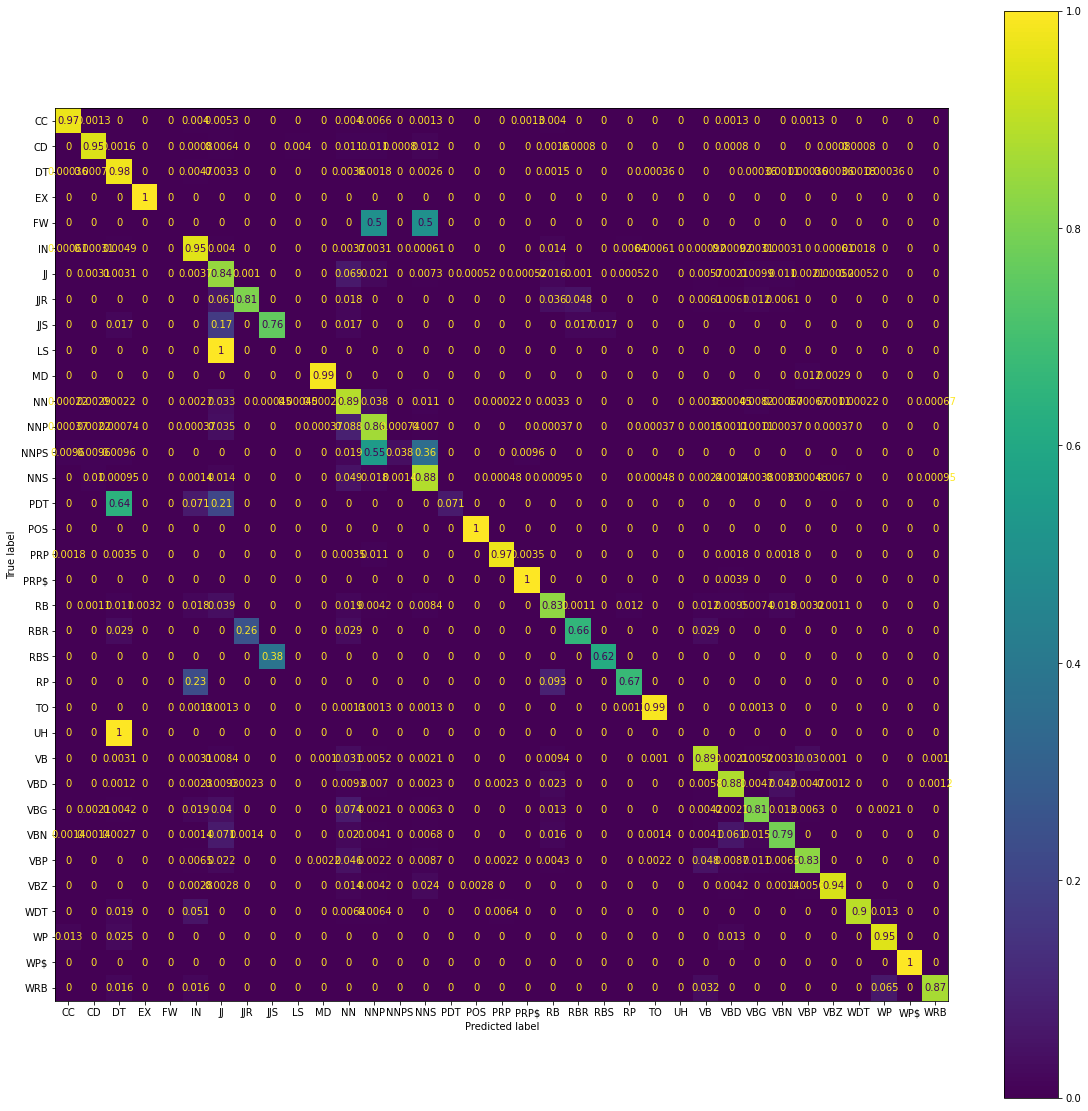

In [ ]:
true_y, pred_y = reduce_results(df_val_y, baseline_pred, encoder)


to_suppress = np.array(["\'\'", "-RRB-", ".", 
                          ":", ",", "-LRB-", "``", 
                          "#", "$", "SYM"]) #LS?
not_missing = np.unique(np.array(list(np.concatenate(df_val_y).flat)))
# exclude tokens which labels are punctuation classes
new_cat = [encoder.categories_[0][i] for i in range(0, len(encoder.categories_[0])) if encoder.categories_[0][i] not in to_suppress and encoder.categories_[0][i] in not_missing ]

fig, ax = plt.subplots(figsize=(20, 20))
ConfusionMatrixDisplay.from_predictions(true_y, pred_y, ax=ax, labels=list(new_cat), normalize = "true")#encoder.categories_[0]))
print(classification_report(true_y,pred_y, labels = new_cat))
print(custom_f1(true_y, pred_y, list(to_suppress)))